<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [1]:
# cell1
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
# cell2
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18



<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
تمام کتابخانه‌های مورد نیاز ایمپورت شده اند که در ادامه در زمان استفاده از هر کدام در مورد آن بحث خواهیم کرد. در سلول بعدی دیتای train به صورت یک دیتافریم خوانده می‌شود.   </div>
</html>
</body>

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
    در سلول‌های بعد با توجه به infoی دیتافریم می‌توان گفت که هیچ دیتای از دست رفته‌ای نداریم. همچنین  تنها یک ستون (Gender) به صورت عددی نیست که در سلول بعدی آن را به شکل عددی در می‌آوریم.<br>
    همچنین ستون شناسه‌ی کاربری را ذخیره می‌کنیم و برای اینکه در خوشه بندی تاثیرگذار نباشد از دیتافریم حذف می‌کنیم.
</html>
</body>

In [3]:
# cell3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# cell4
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})


In [5]:
# cell5
CustomerID = df.copy().CustomerID
del df['CustomerID']

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
همانطور که مشخص است تمام ستون‌ها به صورت عددی در آمدند.<br>
    برای اینکه خروجی بخش EDA ملموس‌تر باشد، Scale کردن داده‌ها را بعد از این بخش انجام می‌دهیم.
    </html>
</body>

## EDA, Strorytelling & Visualization

In [6]:
# cell6
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در جدول بالا داده‌های آماری ستون‌ها مشخص است. طبق این جدول ۴۴ درصد از مشتریان مرد هستند.<br>
    میانگین سن مشتریان ۳۸ سال است در حالی که دامنه‌ی سنی مشتریان از ۱۸ تا ۷۰ است. <br>
    درآمد مشتریان از ۱۵ هزار تا ۱۳۷ هزار دلار است. این نکته که 75pecentile برای درآمد سالیانه مشتریان برابر با ۷۸ هزار دلار است که نشان می‌دهد چارک چهارم رنج گسترده‌تری دارد قابل توجه است. البته همواره میزان درآمد برای یک جامعه‌ی تصادفی به این شکل است.<br>
    بررسی دقیق‌تر داده‌ها را با نمودار‌های مناسب در ادامه انجام می‌دهیم.

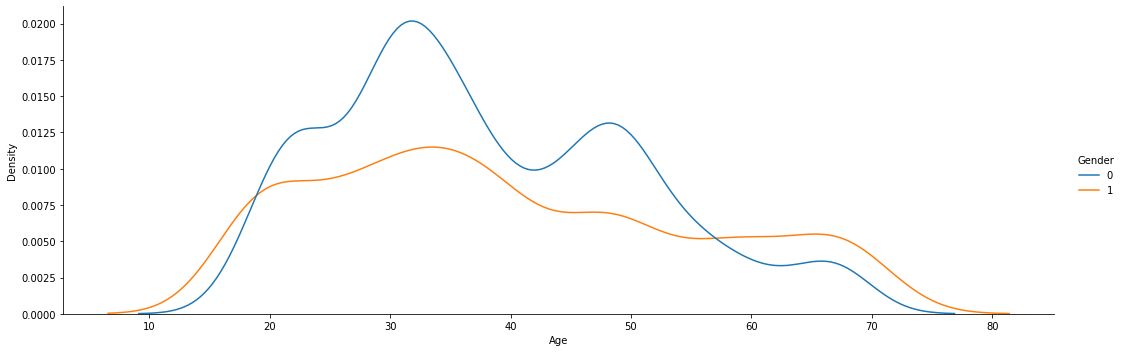

In [7]:
# cell7
sns.displot(df, x="Age", kind="kde", bw_adjust=0.60 ,aspect = 3 ,hue = "Gender")

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
توزیع سن مشتریان که بر اساس جنسیت جداشده اند در نمودار بالا مشخص است. همانطور که گفته شد ۴۴ درصد از مشتریان مرد هستند و انتظار داریم در بیشتر نقاط نمودار مربوط به زنان مقدار بیشتری داشته باشد.<br>
    نکته‌ی قابل توجه در نمودار بالا اسن است که پراکندگی سن مشتریان زن کمتر از مشتریان مرد است. این به این معنا است که مشتریان زن غالبا سنشان بین ۲۰ تا ۵۰ سال است اما مشتریان بخش قابل توجهی از مشتریان مرد سنی بیش از ۵۰ سال دارند و مشتریان ۱۸ تا ۲۰ ساله‌ی ما غالبا مردان هستند.<br>
    به همین دلیل در این دو قسمت نمودار توزیع مردان بالاتر از زنان قرار گرفته است.

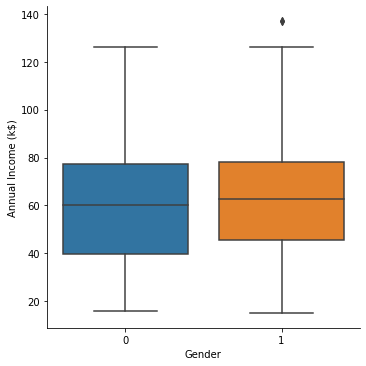

In [8]:
# cell8
sns.catplot(x="Gender", y="Annual Income (k$)", kind="box", data=df)


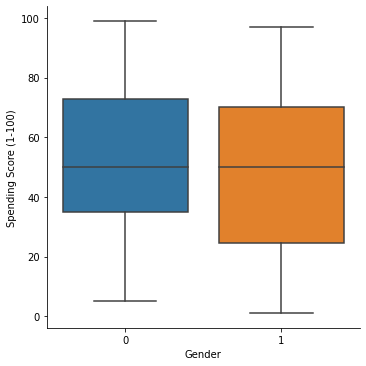

In [9]:
# cell9
sns.catplot(x="Gender", y="Spending Score (1-100)", kind="box", data=df)

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
Box Plot بالا نشان می‌دهد میزان درآمد و خرید مشتری در بین زنان و مردان تفاوت چندانی ندارد. البته اگر با دقت‌تر نگاه کنیم متوجه می‌شویم که زنان علیرغم اینکه درآمد نسبتا کمتری دارند اما امتیاز (میزان خرید) بیشتری دارند که منطقی به نظر می‌رسد.

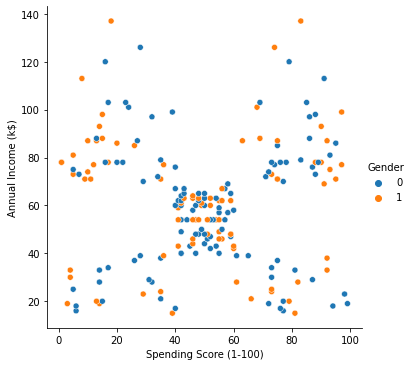

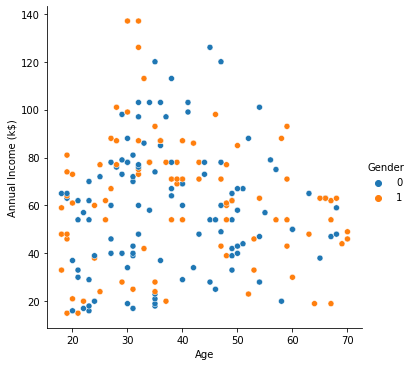

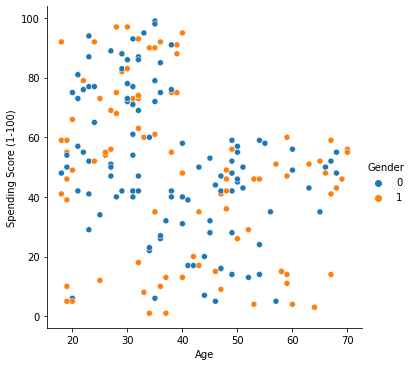

In [10]:
# cell10
sns.relplot(x="Spending Score (1-100)", y="Annual Income (k$)", data=df ,hue='Gender')
sns.relplot(x="Age", y="Annual Income (k$)", data=df ,hue='Gender')
sns.relplot(x="Age", y="Spending Score (1-100)", data=df ,hue='Gender')


<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در سلول دهم نمودار سن، درآمد و میزان خرید به صورت دو به دو با یکدیگر کشیده شده اند که مشتریان زن و مرد از یکدیگر جدا شده اند.<br>
    در نمودار اول میبینیم که مشتریان بر این اساس از ۵ دسته تشکیل شده اند. مشتریانی که درآمدی نزدیک به میانگین دارند خریدشان نیز نزدیک به میانگین است. در حالی که مشتریانی که درآمد خیلی کم و یا خیلی زیاد نسبت به میانگین دارند غالبا امتیازشان از فروشگاه حوالی میانگین نیست و امتیازی بالای ۶۵ و یا زیر ۴۰ دارند.<br>
    در نمودار دوم همانطور که انتظار می‌رود افرادی که در سنی حدود ۳۰ تا ۵۰ دارند بیشترین درآمد را دارند و افراد زیر ۳۰ سال و بالای ۵۰ سال درآمد کمتری دارند که به نظر می‌رسد دلیل آن به ترتیب تازه کار بودن و بازنشستگی (ساعت کار کمتر) است.<br>
    همچنین در نمودار سوم که میزان امتیاز از فروشگاه بر اساس سن مشتریان است این نکته قابل توجه است که افرادی که خرید بیشتری دارند غالبا سنی کمتر از ۳۵ دارند و افراد بین ۳۵ تا ۵۵ سال میزان خرید کم یا متوسط دارند و افراد با سن بالاتر نیز غالبا امتیازشان نزدیک به میانگین است.

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در اینجا بررسی دیتاست و نمودارها به اتمام می‌رسد. نتایج کلی در بالا ذکر شدند. این نکته نیز بهتر است مورد اشاره قرار بگیرد که با توجه به داده‌هایی که داریم، تفاوت زیادی بین زن یا مرد بودن مشتری برای ما وجود ندارد. ممکن است در رفتار خرید و یا کالاهای مورد علاقه این تفاوت آشکار باشد اما آنچه دیتای آن به ما داده شده است و قرار است طبق آن بررسی کنیم این بحث را مورد نظر قرار نمی‌دهد.

## Trani the Model (Clustering)

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FCC558; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
سلول ۱۱ تا ۲۱ در پی انجام خوشه بندی با Scale کردن داده‌ها است که این روش به درستی کار نمی‌کند و در سلول ۲۱ به بعد روش دیگری را امتحان می‌کنیم که پاسخ صحیح در آن است.

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در سلول بعدی با StandardScaler تمام مقادیر را اسکیل می‌کنیم زیرا رنج ستون‌ها با هم تفاوت دارد.<br>
    در سلول‌های ۱۲ و ۱۳ نمودار تابع هزینه بر اساس K را رسم می‌کنیم. با توجه به نمودار به نظر بهترین K ۱۵ به نظر می‌رسد. که در ابتدا برای K=15 خوشه‌بندی را انجام داده و نمودارهای مختلف را بر اساس دسته بندی انجام شده رسم می‌کنیم که با توجه به آنچه در سلول ۱۵ دیده می‌شود خوشه بندی مناسبی انجام نشده است. 

In [11]:
# cell11
X = StandardScaler().fit_transform(df)


In [12]:
# cell12
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

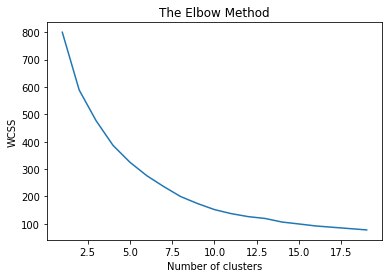

In [13]:
# cell13
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# cell14
kmeans = KMeans(n_clusters = 15, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['cluster'] = y_kmeans

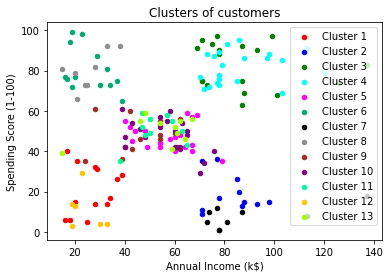

In [15]:
# cell15
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,3], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,3], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,3], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,3], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,3], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.scatter(df[df.cluster  == 5].iloc[:,2], df[df.cluster  == 5].iloc[:,3], s = data_size, c = '#02AB72', label = 'Cluster 6')
plt.scatter(df[df.cluster  == 6].iloc[:,2], df[df.cluster  == 6].iloc[:,3], s = data_size, c = 'black', label = 'Cluster 7')
plt.scatter(df[df.cluster  == 7].iloc[:,2], df[df.cluster  == 7].iloc[:,3], s = data_size, c = '#8E8E8E', label = 'Cluster 8')
plt.scatter(df[df.cluster  == 8].iloc[:,2], df[df.cluster  == 8].iloc[:,3], s = data_size, c = 'brown', label = 'Cluster 9')
plt.scatter(df[df.cluster  == 9].iloc[:,2], df[df.cluster  == 9].iloc[:,3], s = data_size, c = 'purple', label = 'Cluster 10')
plt.scatter(df[df.cluster  == 10].iloc[:,2], df[df.cluster  == 10].iloc[:,3], s = data_size, c = '#00FF9A', label = 'Cluster 11')
plt.scatter(df[df.cluster  == 11].iloc[:,2], df[df.cluster  == 11].iloc[:,3], s = data_size, c = '#FFC400', label = 'Cluster 12')
plt.scatter(df[df.cluster  == 12].iloc[:,2], df[df.cluster  == 12].iloc[:,3], s = data_size, c = '#A2FF00', label = 'Cluster 13')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
حالا با توجه به نمودار می‌توانیم برای خوشه‌بندی از K=5 نیز استفاده کنیم و نتیجه‌ی آن را مشاهده کنیم.<br>
    نمودارهای مختلف خوشه‌ها در زیر کشیده شده است که همانطور که مشاهده می‌شود این خوشه بندی نیز نتایج خوبی از خود نشان نمی‌دهد که در ادامه به دلیل آن می‌پردازیم.

In [16]:
# cell16
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['cluster'] = y_kmeans

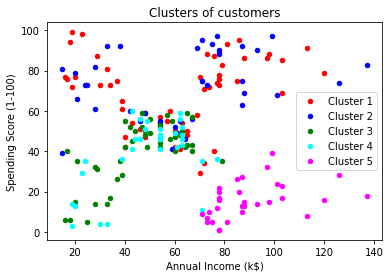

In [17]:
# cell17
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,3], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,3], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,3], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,3], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,3], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

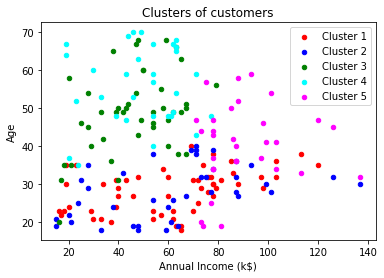

In [18]:
# cell18
data_size=20
centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,1], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,1], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,1], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,1], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,1], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.show()

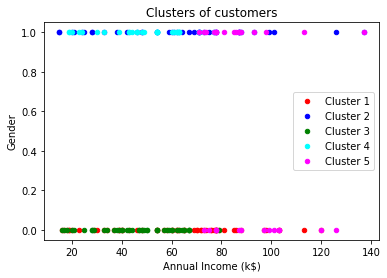

In [19]:
# cell19
data_size=20
centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,0], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,0], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,0], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,0], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,0], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Gender')
plt.legend()
plt.show()

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FCC558; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در ادامه خوشه‌بندی را با روش DBSCAN نیز انجام می‌دهیم که نتایج آن نیز مناسب نیست.

In [20]:
# cell20
db = DBSCAN(eps=0.75, min_samples=3).fit(X)
labels = db.labels_
labels
df['cluster'] = labels

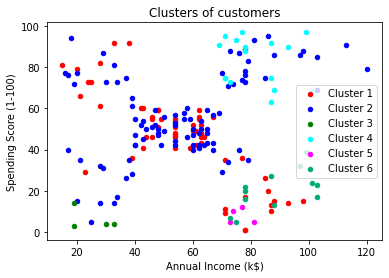

In [21]:
# cell21
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,3], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,3], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,3], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,3], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,3], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.scatter(df[df.cluster  == 5].iloc[:,2], df[df.cluster  == 5].iloc[:,3], s = data_size, c = '#02AB72', label = 'Cluster 6')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### it doesn't response :)

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
دلیل پاسخ ندادن خوشه بندی این است که فیچر مشتریان scale شده است. با توجه به EDA انجام شده جنسیت مشتریان باعث تفاوت چندانی در رفتار مشتریان نمی‌شود اما با توجه به اسکیل انجام شد، تاثیر تفاوت جنسیت دو مشتری معادل تفاوت بسیار زیاد در حقوق یا امتیاز آن‌ها است.<br>
    حال با توجه به آنکه سه فیچر دیگر تقریبا اسکیل‌های یکسانی دارند آن‌ها را اسکیل نمی‌کنیم و با توجه به تاثیر کم جنسیت در تعیین رفتار مشتریان، رنج این فیچر را برابر با ۵ قرار می‌دهیم و سپس خوشه‌بندی را با این شرایط انجام داده تا نتایج را بررسی کنیم.

In [22]:
# cell22
df2=df.copy()[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

In [23]:
# cell23
df2['Gender'] = df2['Gender']*5
df2

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,5,19,15,39
1,5,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,5,32,126,74
198,5,32,137,18


In [24]:
# cell24
X2=df2.values

In [25]:
# cell25
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

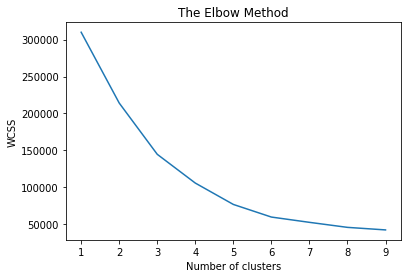

In [26]:
# cell26
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<!DOCTYPE html>
<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
با توجه به نمودار سلول ۲۶ می‌توان K=5 و K=6 را برای خوشه بندی انتخاب کرد که با توجه به نمودارها هر دو می‌توانند خوشه بندی مناسبی باشند.<br>
    در واقع تفاوت K=5 و K=6 در آن است که مشتریانی که امتیاز و درآمد متوسط دارند را به دو خوشه‌ی جوان و میان‌سال تقسیم می‌کند.

In [27]:
# cell27
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X2)
df['cluster'] = y_kmeans

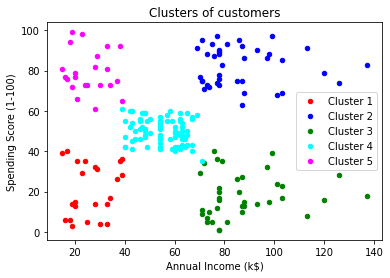

In [28]:
# cell28
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,3], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,3], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,3], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,3], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,3], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

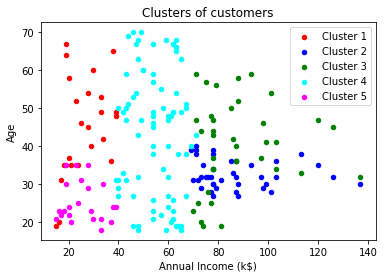

In [29]:
# cell29
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,1], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,1], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,1], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,1], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,1], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.show()

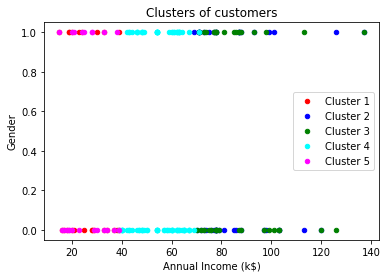

In [30]:
# cell30
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,0], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,0], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,0], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,0], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,0], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Gender')
plt.legend()
plt.show()

In [31]:
# cell31
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X2)
df['cluster'] = y_kmeans

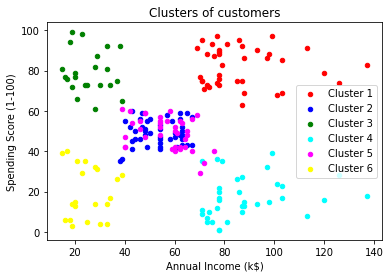

In [32]:
# cell32
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,3], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,3], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,3], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,3], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,3], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.scatter(df[df.cluster  == 5].iloc[:,2], df[df.cluster  == 5].iloc[:,3], s = data_size, c = 'yellow', label = 'Cluster 6')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

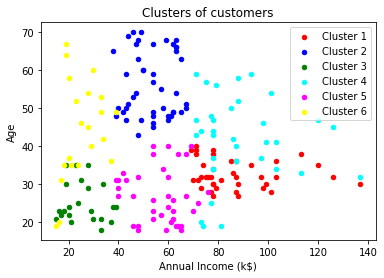

In [33]:
# cell33
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,1], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,1], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,1], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,1], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,1], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.scatter(df[df.cluster  == 5].iloc[:,2], df[df.cluster  == 5].iloc[:,1], s = data_size, c = 'yellow', label = 'Cluster 6')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.show()

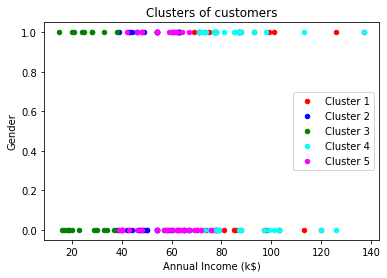

In [34]:
# cell34
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,0], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,0], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,0], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,0], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,0], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Gender')
plt.legend()
plt.show()

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در ادامه با روش DBSCAN هم خوشه بندی را انجام می‌دهیم. برای tune کردن پارامتر‌ها از سلول ۳۶ استفاده می‌کنیم. شرط ما برای خوب بودن خوشه بندی این است که تعداد خوشه‌ها بین ۴ و ۱۰ باشد و همچنین حداکثر ۱۰ درصد از داده‌ها به عنوان داده‌ی پرت تشخصی داده شوند.<br>
    سپس خوشه بندی با بهترین پارامترها انجام شده و نمودار آن کشیده می‌شود که به نظر خوشه بندی مناسبسی انجام نشده است.

In [35]:
# cell35
epsilons = np.linspace(0.5,20,40)
min_samples_list=np.linspace(2,20,19)

In [36]:
# cell36
for e in epsilons:
    for m in min_samples_list:
        db = DBSCAN(eps=e, min_samples=m).fit(X2)
        labels = db.labels_
        if (1-(labels==-1).sum()/200) >0.9 and labels.max() >= 3 and  labels.max() < 10:
            print(f'for min_sup={m} and eps={e} clustered percentage={(1-(labels==-1).sum()/200)} and number of clusters={labels.max()+1}')

for min_sup=2.0 and eps=12.5 clustered percentage=0.945 and number of clusters=8
for min_sup=3.0 and eps=12.5 clustered percentage=0.905 and number of clusters=4
for min_sup=2.0 and eps=13.0 clustered percentage=0.95 and number of clusters=7
for min_sup=4.0 and eps=13.0 clustered percentage=0.905 and number of clusters=5
for min_sup=2.0 and eps=13.5 clustered percentage=0.965 and number of clusters=4
for min_sup=4.0 and eps=13.5 clustered percentage=0.9299999999999999 and number of clusters=4
for min_sup=2.0 and eps=14.0 clustered percentage=0.975 and number of clusters=5
for min_sup=6.0 and eps=14.5 clustered percentage=0.905 and number of clusters=4


In [37]:
# cell37
db = DBSCAN(eps=13.5, min_samples=4).fit(X2)
labels = db.labels_

df['cluster'] = labels
labels

array([ 0,  0, -1,  0,  0,  0,  1,  0,  1,  0, -1, -1,  1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  3,  2,
        0,  2,  3,  2,  0,  2,  0,  2,  3,  2,  0,  2,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  3,  2,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,
        2,  0,  2,  0, -1, -1,  2, -1, -1, -1, -1, -1, -1], dtype=int64)

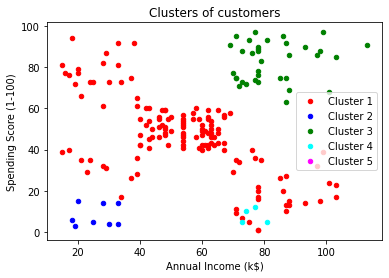

In [38]:
# cell38
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,3], s = data_size, c = 'red', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,3], s = data_size, c = 'blue', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,3], s = data_size, c = 'green', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,3], s = data_size, c = 'cyan', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,3], s = data_size, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
با توجه به اینکه دیتاست به نسبت کوچک است و تعداد فیچرها کم است، روش K-means برای خوشه بندی بهتر است.<br>
    طبق آنچه گفته شد اگر بخواهیم مشتریان متوسط از نظر درآمد و امتیاز را به دو خوشه‌ی مجزا از نظر سن تقسیم کنیم از K=6 استفاده می‌کنیم. در غیر این صورت از K=5 برای خوشه بندی استفاده می‌کنیم.<br>
    در ادامه خوشه بندی با K=6 مجددا آورده می‌شود و توضیح مختصری در مورد کلاسترها داده می‌شود.

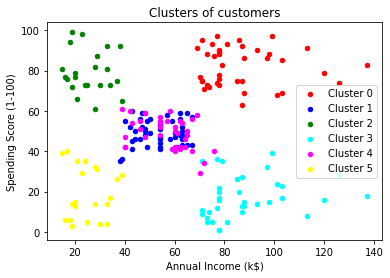

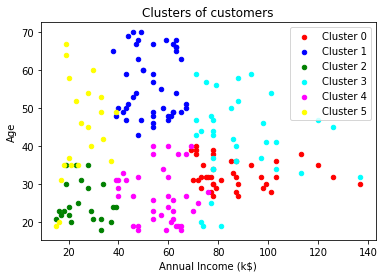

In [39]:
#cell39
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X2)
df['cluster'] = y_kmeans
data_size=20
# centroid_size=50
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,3], s = data_size, c = 'red', label = 'Cluster 0')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,3], s = data_size, c = 'blue', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,3], s = data_size, c = 'green', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,3], s = data_size, c = 'cyan', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,3], s = data_size, c = 'magenta', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 5].iloc[:,2], df[df.cluster  == 5].iloc[:,3], s = data_size, c = 'yellow', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
plt.scatter(df[df.cluster  == 0].iloc[:,2], df[df.cluster  == 0].iloc[:,1], s = data_size, c = 'red', label = 'Cluster 0')
plt.scatter(df[df.cluster  == 1].iloc[:,2], df[df.cluster  == 1].iloc[:,1], s = data_size, c = 'blue', label = 'Cluster 1')
plt.scatter(df[df.cluster  == 2].iloc[:,2], df[df.cluster  == 2].iloc[:,1], s = data_size, c = 'green', label = 'Cluster 2')
plt.scatter(df[df.cluster  == 3].iloc[:,2], df[df.cluster  == 3].iloc[:,1], s = data_size, c = 'cyan', label = 'Cluster 3')
plt.scatter(df[df.cluster  == 4].iloc[:,2], df[df.cluster  == 4].iloc[:,1], s = data_size, c = 'magenta', label = 'Cluster 4')
plt.scatter(df[df.cluster  == 5].iloc[:,2], df[df.cluster  == 5].iloc[:,1], s = data_size, c = 'yellow', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.legend()
plt.show()

<html>
<body align="right">
<br>
<div style="direction:rtl">
<p style="background-color:#FFFEEC; border:1px solid black; border-radius: 10px; font-size:16px; line-height:1.8; font-family: byekan; text-align:justify; padding-left: 50px; padding-right: 50px; padding: 25px;" >
در خوشه بندی انجام شده همانطور که مشاهده می‌شود:<br>
    -cluster0: افرادی که درآمد زیاد و امتیاز زیاد دارند که غالب این افراد سنی کمتر از ۴۰ سال دارند<br>
    -cluster1: افرادی که درآمد و امتیاز متوسط دارند که سنی بیشتر از  ۴۰ سال دارند<br>
    -cluster2: افرادی که درآمد کم و امتیاز زیاد دارند که غالب این افراد سنی کمتر از ۳۵ سال دارند<br>
    -cluster3: افرادی که درآمد زیاد و امتیاز کم دارند که غالب این افراد سنی بیشتر از ۳۵ سال دارند<br>
    -cluster4: افرادی که درآمد و امتیاز متوسط دارند که سنی کمتر از  ۴۰ سال دارند<br>
    -cluster5: افرادی که درآمد کم و امتیاز کم دارند که غالب این افراد سنی بیشتر از ۳۵ سال دارند<br><br>
    در ادامه نیز دیتافریم نتایج خوشه‌بندی‌ها آورده شده است.

In [40]:
clustering_result_df = pd.DataFrame({'Customer ID':CustomerID , 'cluster':y_kmeans})
clustering_result_df

,Customer ID,cluster
0,1,5
1,2,2
2,3,5
3,4,2
4,5,5
...,...,...
195,196,0
196,197,3
197,198,0
198,199,3


In [41]:
clustering_result_df.to_csv('clustering_report.csv',index=False)